# Lab 6: Linear Regression

Given a data set with pairs of input feature vector and output value(s), a regression model can be learned. There are different regression models that you can try, including linear regression, ridge Regression, etc. 

Let us consider the simplest form of a linear regression model (i.e., fitting a straight line to one-dimensional input data). This simple model can be extended to model more complicated data behavior.

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$
y = \theta_1x + \theta_0
$
where $\theta_1$ is commonly known as the *slope*, and $\theta_0$ is commonly known as the *intercept* (also known as *bias*).

Consider the following data which is generated by scattering about a line with a slope of 2 and an intercept of -5 with some random fluctuations:

### Generating synthetic data for experiments

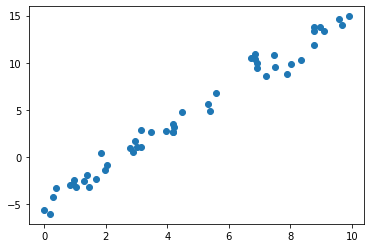

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# construct a random number generator
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)          # randomly generated input x
y = 2 * x - 5 + rng.randn(50)  # use theta_1*x + theta_0 + noise to generated output y

plt.scatter(x, y);

### Implement your linear regression from first principle

Solution for Linear Regression
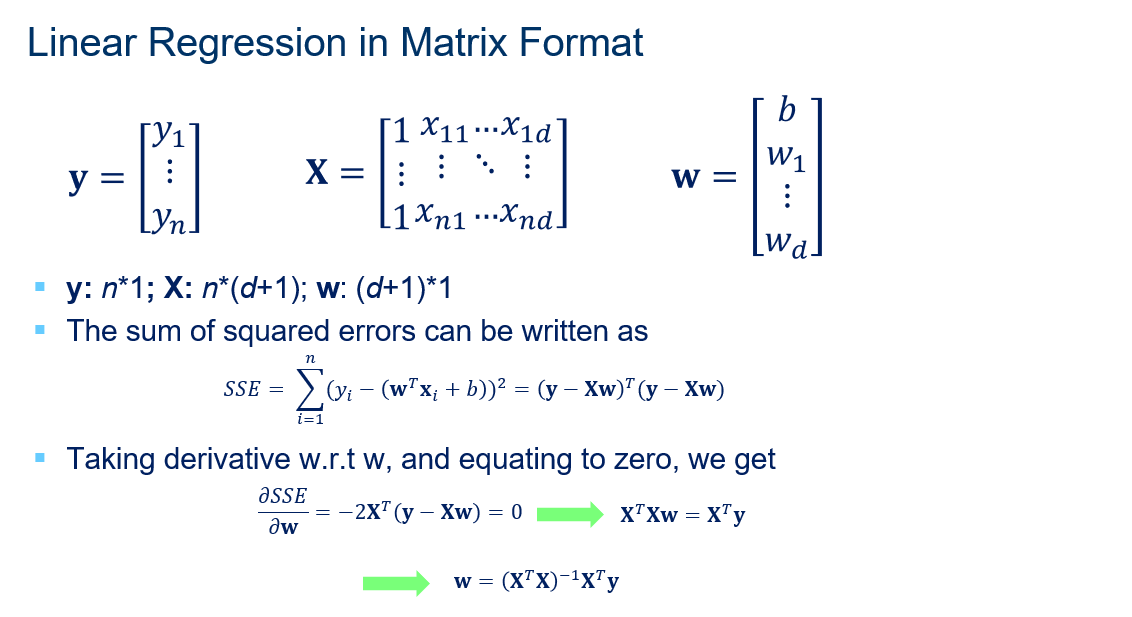

In [12]:
# Implement your linear regression algorithm

def my_lr_train(X_train, y_train):
    # concatenating a column with all one to X_train for handling the bias term
    X_train = np.c_[np.ones(X_train.shape[0]), X_train] 
    # compute the regression model parameters
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)),np.dot(np.transpose(X_train),y_train))
    return w

w = my_lr_train(x, y)

print("Model slope:    ", round(w[1],2))
print("Model intercept:", round(w[0],2))

Model slope:     2.03
Model intercept: -5.0


We see that the results are very close to the expected values. 

[1.14374817e-03 9.88861089e+00] [-4.99625847 15.04770203]


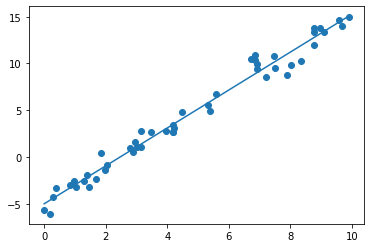

In [13]:
# Plot the line
xfit = np.array([x.min(), x.max()])
yfit = np.dot(np.c_[np.ones(xfit.shape[0]), xfit], w)
plt.scatter(x, y)
print(xfit,yfit)
plt.plot(xfit, yfit)

## Using scikit-learn's linear functions

Regression model slope:     [2.02720881]
Regression model intercept: -4.998577085553202


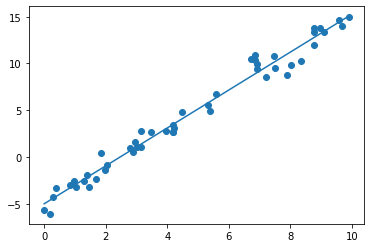

In [19]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

# np.newaxis is to add a new dimension
model.fit(x[:, np.newaxis], y)

print("Regression model slope:    ", model.coef_)
print("Regression model intercept:", model.intercept_)

xfit = np.array([x.min(), x.max()])
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Case study: Predict Housing Price by Linear Regression

In [20]:
import pandas as pd
df = pd.read_csv('boston_house_dataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Boston House Data Description
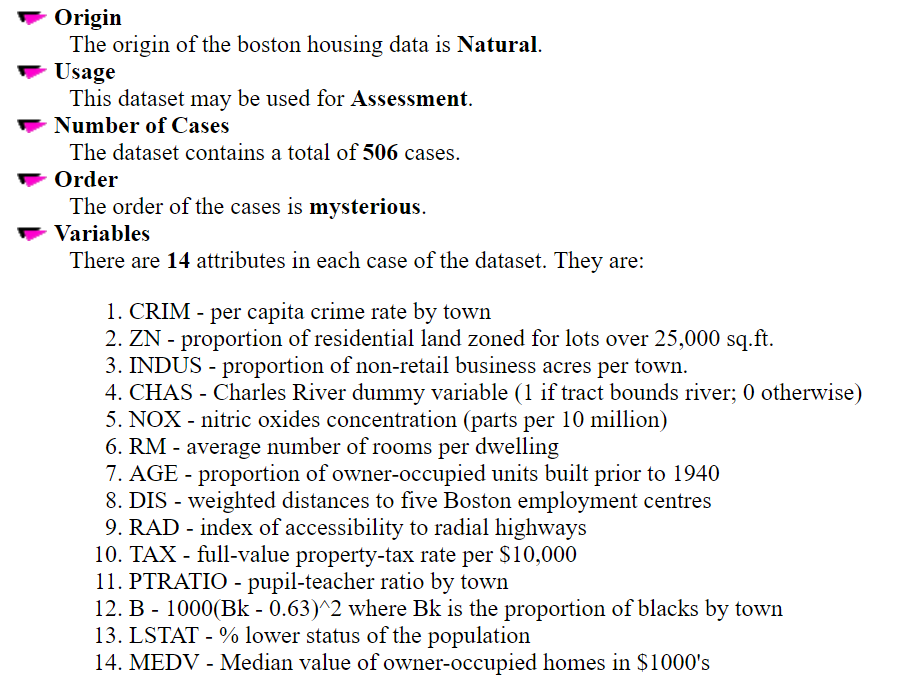

In [22]:
# Split the data for training and test
X = df.drop(['MEDV'], axis=1).values
y = df['MEDV'].values
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

### Evaluation Metrics for Regression
https://scikit-learn.org/stable/modules/model_evaluation.html
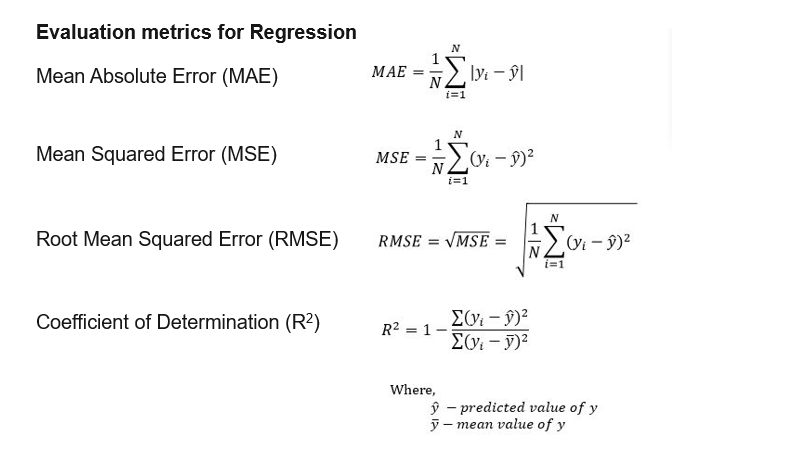

In [183]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  3.213270495842373
MSE:  20.86929218377072
RMSE: 4.568292042303198
R2 Score:  0.7334492147453087


### Cross Validation with Linear Regression

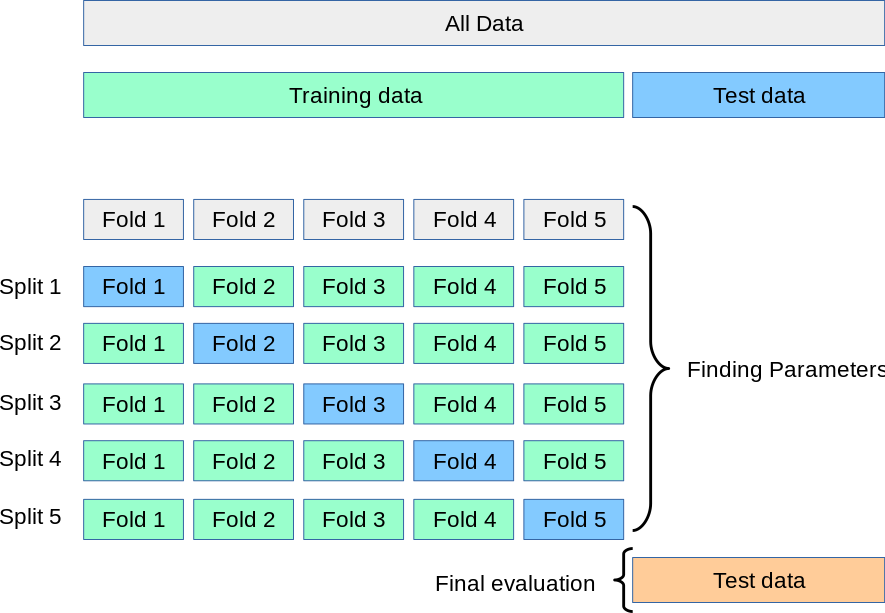

In [28]:
from sklearn.model_selection import cross_val_score
lr_model = LinearRegression(fit_intercept=True)
mse = -cross_val_score(lr_model, X, y, cv=10, scoring = 'neg_mean_squared_error')
print('MSE = ',mse)
print('MSE (average) = ',round(mse.mean(),3))

MSE =  [  9.287  14.151  14.074  35.207  31.885  19.836   9.947 168.375  33.33
  10.96 ]
MSE (average) =  34.705
